-----------------------------------------------------------------------------
                             Python Script
-----------------------------------------------------------------------------
Author: Dr. Hyunglok Kim
Affiliation: School of Earth Sciences and Environmental Engineering,
             Gwangju Institute of Science and Technology (GIST)

Date: 2023

Version: 1.0

Course: EN5422/EV4238 - Applied Machine Learning for Environmental Data Analysis

-----------------------------------------------------------------------------
                            COPYRIGHT NOTICE
-----------------------------------------------------------------------------
© 2023 Dr. Hyunglok Kim, Gwangju Institute of Science and Technology.
All Rights Reserved.

Permission is granted to any individual or institution to use, copy, or
redistribute this software and documentation, under the following
conditions:

1. The software and documentation must not be distributed for profit,
   and must retain this copyright notice.

2. Any modifications to the software must be documented and those
   modifications must be released under the same terms as this license.

3. This software and documentation is provided "as is". The author(s)
   disclaim all warranties, whether express or implied, including but
   not limited to implied warranties of merchantability and fitness
   for a particular purpose.

-----------------------------------------------------------------------------
                               DESCRIPTION
-----------------------------------------------------------------------------
This script is written as part of the teaching materials for the
EN5422/EV4238 course "Applied Machine Learning for Environmental Data Analysis"
at Gwangju Institute of Science and Technology (GIST).

For detailed usage, please refer to the accompanying documentation
or course materials.

For questions, feedback, or further information, please contact:

Dr. Hyunglok Kim
Email: hyunglokkim@gist.ac.kr

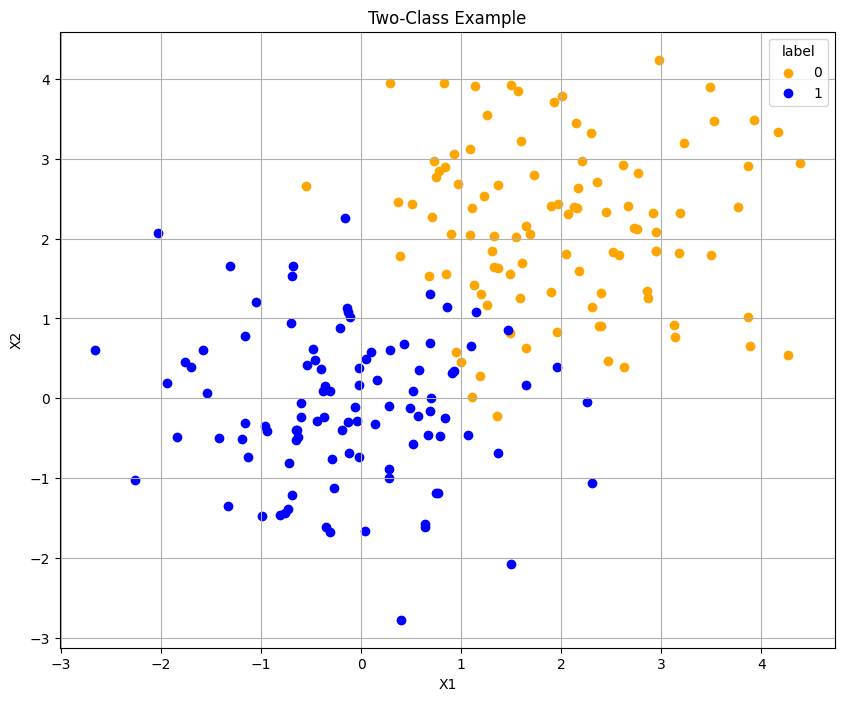

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic data for two classes
# Class 0
x0 = np.random.normal(2, 1, (100, 2))  # Generate 100 2D-points around (2,2)
# Class 1
x1 = np.random.normal(0, 1, (100, 2))  # Generate 100 2D-points around (0,0)

# Combine the data from both classes
X = np.vstack((x0, x1))
y = np.array([0]*100 + [1]*100)  # Labels for the classes

# Plotting the data
plt.figure(figsize=(10,8))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='orange', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='1')
plt.title('Two-Class Example')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(title='label')
plt.grid(True)
plt.show()


<ipython-input-9-8164b745b773>:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0.03, 0.9, 1])  # Adjust the layout to make room for the legend


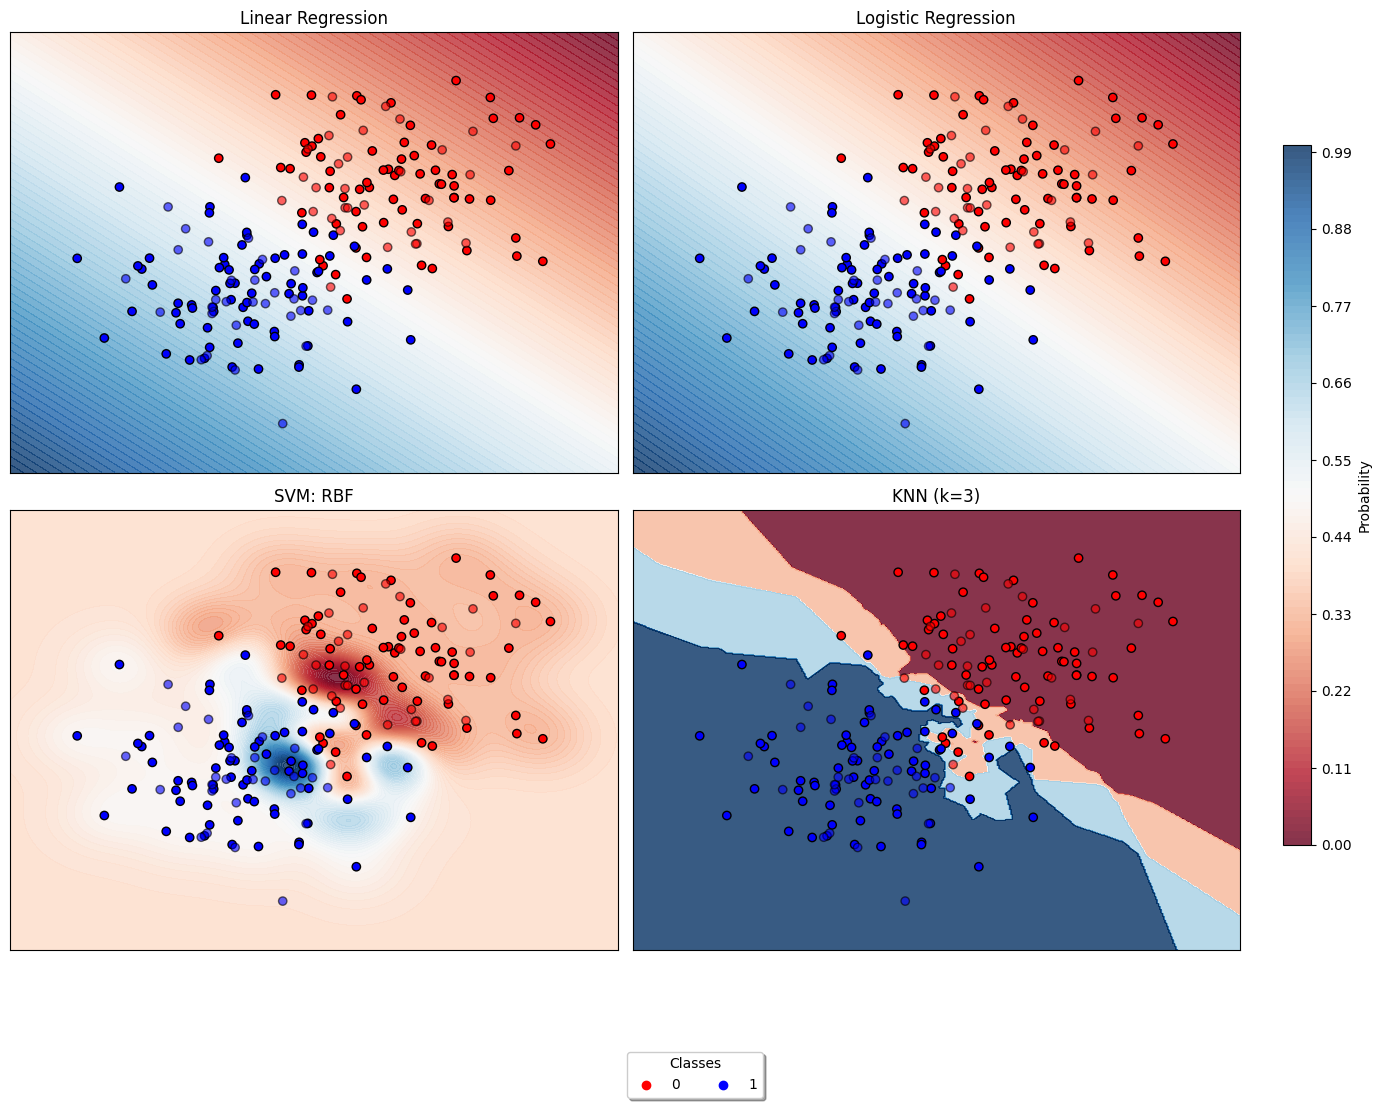

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Prepare the synthetic dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(),
    'SVM: RBF': SVC(kernel='rbf', C=100, gamma=2, probability=True),
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3)
}

# Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Set up plotting
i = 1  # Reset the subplot index
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Re-plot each model with smoother probability estimates
for name, model in models.items():
    ax = axs.flatten()[i-1]
    model.fit(X_train, y_train)

    # Get the probability estimates or decision boundary depending on the model
    if hasattr(model, "decision_function"):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = (Z - Z.min()) / (Z.max() - Z.min())  # Scale the decision function to [0,1]
    elif hasattr(model, "predict_proba"):
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    elif name == 'Linear Regression':
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = (Z - Z.min()) / (Z.max() - Z.min())  # Scale the linear regression output to [0,1]

    Z = Z.reshape(xx.shape)
    contour = ax.contourf(xx, yy, Z, n_levels, cmap=cm, alpha=.8)

    # Plot training and testing points
    scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    i += 1

# Create a legend for the plot
handles, labels = scatter.legend_elements(prop="colors")
legend1 = fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, -0.05),
                     fancybox=True, shadow=True, ncol=5, title="Classes")

# Add a colorbar to the right of the subplot to show the probability scale
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Probability')

fig.tight_layout(rect=[0, 0.03, 0.9, 1])  # Adjust the layout to make room for the legend
plt.show()

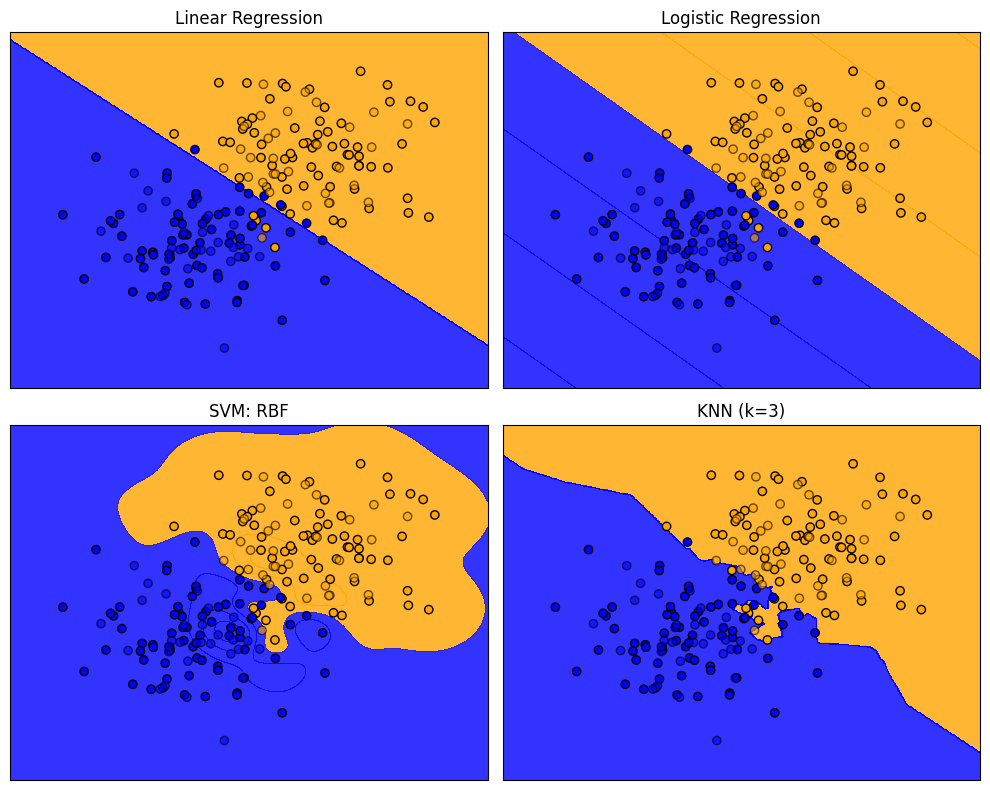

In [ ]:
# To display hard classification boundaries, we will plot the decision regions as before but without probabilities.
# This will show distinct regions of class 0 and class 1 without the gradient.

# Set up the plotting
i = 1
plt.figure(figsize=(10, 8))

# Plot each model
for name, model in models.items():
    ax = plt.subplot(2, 2, i)
    model.fit(X_train, y_train)

    # Make predictions across the grid
    if hasattr(model, "decision_function"):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # For linear regression, we need to convert the continuous output to binary
    if name == 'Linear Regression':
        Z = np.where(Z > 0.5, 1, 0)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=ListedColormap(['#FFA500', '#0000FF']), alpha=.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['#FFA500', '#0000FF']),
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(['#FFA500', '#0000FF']), alpha=0.6,
               edgecolors='k')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    i += 1

plt.tight_layout()
plt.show()


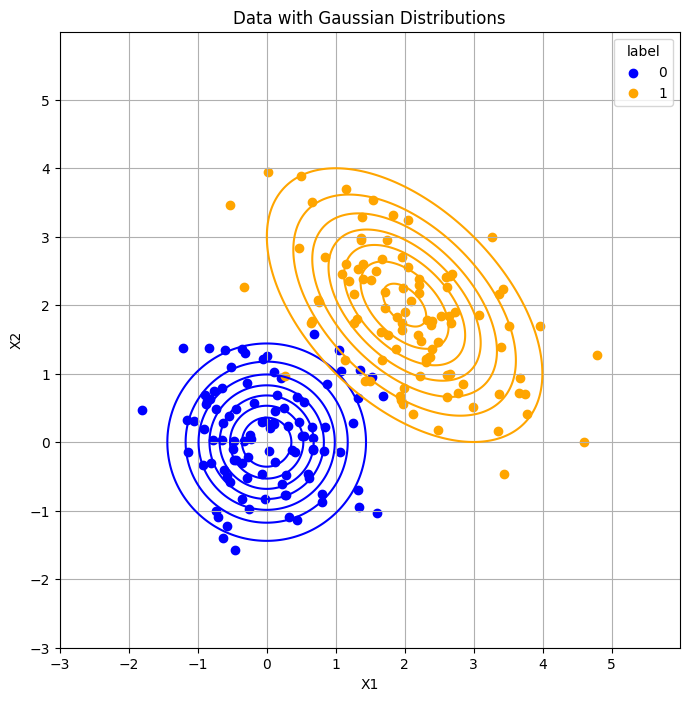

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Redefine the dataset
np.random.seed(0)  # Ensure reproducibility

# Parameters for class 0
mu0 = np.array([0, 0])
Sigma0 = np.array([[0.5, 0], [0, 0.5]])
class0 = np.random.multivariate_normal(mu0, Sigma0, 100)

# Parameters for class 1
mu1 = np.array([2, 2])
Sigma1 = np.array([[1, -0.5], [-0.5, 1]])
class1 = np.random.multivariate_normal(mu1, Sigma1, 100)

# Combine the data
X = np.vstack((class0, class1))
labels = np.array([0]*100 + [1]*100)  # Class labels, renamed to 'labels' to avoid conflict

# Generate grid points for contour plots
x_grid, y_grid = np.mgrid[-3:6:.01, -3:6:.01]
pos = np.dstack((x_grid, y_grid))

# Generate the Gaussian distributions on the grid
rv0 = multivariate_normal(mu0, Sigma0)
rv1 = multivariate_normal(mu1, Sigma1)

# Make the plot
plt.figure(figsize=(8, 8))
plt.scatter(X[labels == 0][:, 0], X[labels == 0][:, 1], color='blue', label='0')
plt.scatter(X[labels == 1][:, 0], X[labels == 1][:, 1], color='orange', label='1')

# Plot the contours
plt.contour(x_grid, y_grid, rv0.pdf(pos), colors='blue')
plt.contour(x_grid, y_grid, rv1.pdf(pos), colors='orange')

plt.title('Data with Gaussian Distributions')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(title='label')
plt.grid(True)
plt.show()

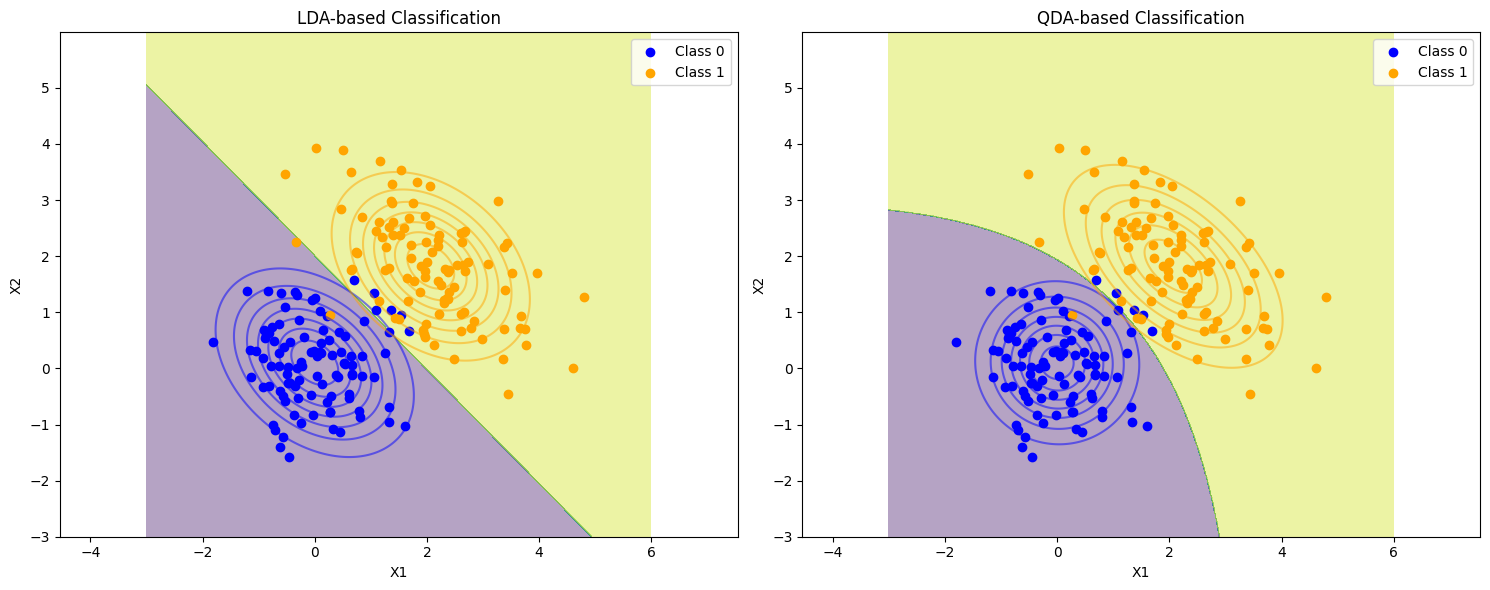

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Redefine the dataset
np.random.seed(0)  # Ensure reproducibility

# Parameters for class 0 and class 1
mu0 = np.array([0, 0])
Sigma0 = np.array([[0.5, 0], [0, 0.5]])
mu1 = np.array([2, 2])
Sigma1 = np.array([[1, -0.5], [-0.5, 1]])
class0 = np.random.multivariate_normal(mu0, Sigma0, 100)
class1 = np.random.multivariate_normal(mu1, Sigma1, 100)

# Combine the data
X = np.vstack((class0, class1))
labels = np.array([0]*100 + [1]*100)  # Class labels

# Perform LDA and QDA
lda = LinearDiscriminantAnalysis()
lda.fit(X, labels)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X, labels)

# Manually compute the pooled covariance matrix for LDA
n_features = X.shape[1]
overall_covariance = np.zeros((n_features, n_features))
for label in np.unique(labels):
    class_cov = np.cov(X[labels == label].T)
    overall_covariance += class_cov * np.sum(labels == label)
overall_covariance /= len(labels)

# Manually compute the class-specific covariance matrices for QDA
qda_covariances = [np.cov(X[labels == label].T) for label in np.unique(labels)]

# Generate grid points for contour plots
x_grid, y_grid = np.mgrid[-3:6:.01, -3:6:.01]
pos = np.dstack((x_grid, y_grid))

# Generate the Gaussian distributions on the grid based on estimated parameters
lda_rv0 = multivariate_normal(lda.means_[0], overall_covariance)
lda_rv1 = multivariate_normal(lda.means_[1], overall_covariance)

qda_rv0 = multivariate_normal(qda.means_[0], qda_covariances[0])
qda_rv1 = multivariate_normal(qda.means_[1], qda_covariances[1])

# Predict classes using the classifiers
Z_lda = lda.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
Z_lda = Z_lda.reshape(x_grid.shape)

Z_qda = qda.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
Z_qda = Z_qda.reshape(x_grid.shape)

# Plotting
plt.figure(figsize=(15, 6))

# LDA subplot
plt.subplot(1, 2, 1)
plt.contourf(x_grid, y_grid, Z_lda, alpha=0.4)
plt.contour(x_grid, y_grid, lda_rv0.pdf(pos), colors='blue', alpha=0.5)
plt.contour(x_grid, y_grid, lda_rv1.pdf(pos), colors='orange', alpha=0.5)
plt.scatter(class0[:, 0], class0[:, 1], color='blue', label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], color='orange', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('LDA-based Classification')
plt.legend()
plt.axis('equal')

# QDA subplot
plt.subplot(1, 2, 2)
plt.contourf(x_grid, y_grid, Z_qda, alpha=0.4)
plt.contour(x_grid, y_grid, qda_rv0.pdf(pos), colors='blue', alpha=0.5)
plt.contour(x_grid, y_grid, qda_rv1.pdf(pos), colors='orange', alpha=0.5)
plt.scatter(class0[:, 0], class0[:, 1], color='blue', label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], color='orange', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('QDA-based Classification')
plt.legend()
plt.axis('equal')

plt.tight_layout()
plt.show()


(-3.0, 5.99, -3.0, 5.99)

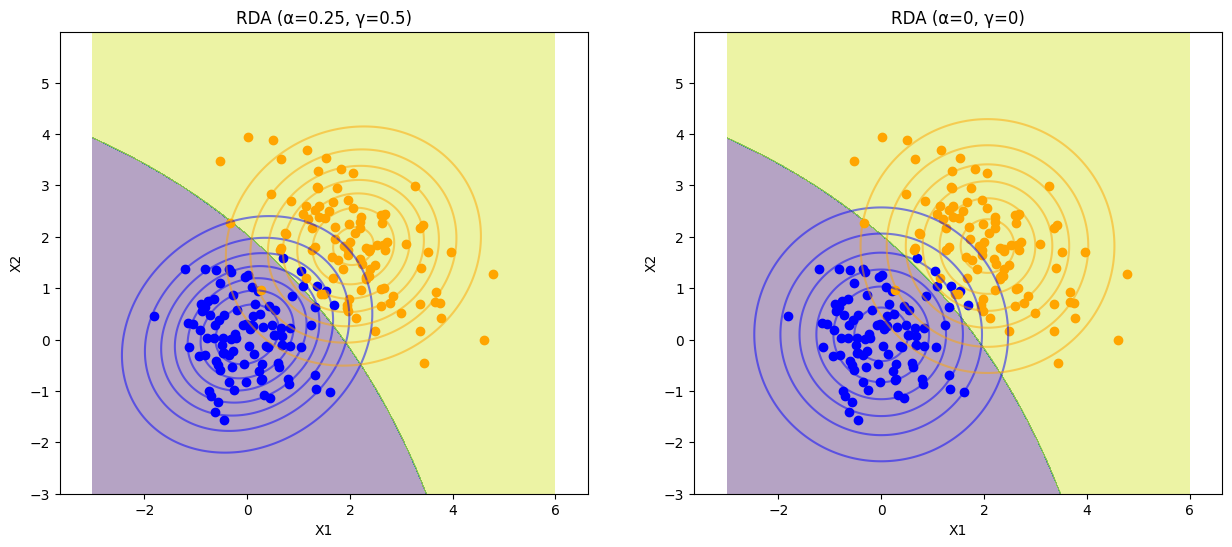

In [35]:
from sklearn.base import BaseEstimator, ClassifierMixin

class RegularizedDiscriminantAnalysis(BaseEstimator, ClassifierMixin):
    def __init__(self, alpha=0.0, gamma=0.0):
        self.alpha = alpha
        self.gamma = gamma

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.means_ = np.array([X[y == k].mean(axis=0) for k in self.classes_])
        self.covariances_ = self._compute_covariances(X, y)
        return self

    def _compute_covariances(self, X, y):
        n_features = X.shape[1]
        covariances = []
        pooled_cov = np.cov(X.T)  # Pooled covariance matrix (LDA)
        avg_var = np.mean(np.diag(pooled_cov))  # Average variance

        for k in self.classes_:
            class_cov = np.cov(X[y == k].T)  # Class-specific covariance matrix (QDA)
            rda_cov = self.alpha * class_cov \
                      + (1 - self.alpha) * (self.gamma * pooled_cov \
                      + (1 - self.gamma) * avg_var * np.eye(n_features))
            covariances.append(rda_cov)

        return np.array(covariances)

    def predict(self, X):
        discriminants = np.array([self._compute_discriminant(X, k) for k in self.classes_]).T
        return self.classes_[np.argmax(discriminants, axis=1)]

    def _compute_discriminant(self, X, k):
        mean_diff = X - self.means_[k]
        inv_cov = np.linalg.inv(self.covariances_[k])
        return -0.5 * np.sum(mean_diff @ inv_cov * mean_diff, axis=1) \
               - 0.5 * np.log(np.linalg.det(self.covariances_[k])) \
               + np.log(np.mean(self.classes_ == k))

# Prepare the data and covariance matrices from the previous setup
X = np.vstack((class0, class1))
labels = np.array([0]*100 + [1]*100)
n_features = X.shape[1]
overall_covariance = np.zeros((n_features, n_features))
qda_covariances = [np.cov(X[labels == label].T) for label in np.unique(labels)]

# Create RDA models with different alpha and gamma values
rda1 = RegularizedDiscriminantAnalysis(alpha=0.25, gamma=0.5)  # RDA with alpha=0.25, gamma=0.5
rda2 = RegularizedDiscriminantAnalysis(alpha=0, gamma=0)       # RDA with alpha=0, gamma=0 (similar to LDA)

# Fit the RDA models
rda1.fit(X, labels)
rda2.fit(X, labels)

# Predict classes using the RDA models
Z_rda1 = rda1.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
Z_rda1 = Z_rda1.reshape(x_grid.shape)

Z_rda2 = rda2.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
Z_rda2 = Z_rda2.reshape(x_grid.shape)

# Generate the Gaussian distributions on the grid based on estimated parameters
rda1_rv0 = multivariate_normal(rda1.means_[0], rda1.covariances_[0])
rda1_rv1 = multivariate_normal(rda1.means_[1], rda1.covariances_[1])

rda2_rv0 = multivariate_normal(rda2.means_[0], rda2.covariances_[0])
rda2_rv1 = multivariate_normal(rda2.means_[1], rda2.covariances_[1])

# Plotting
plt.figure(figsize=(15, 6))

# RDA with alpha=0.25, gamma=0.5 subplot
plt.subplot(1, 2, 1)
plt.contourf(x_grid, y_grid, Z_rda1, alpha=0.4)
plt.contour(x_grid, y_grid, rda1_rv0.pdf(pos), colors='blue', alpha=0.5)
plt.contour(x_grid, y_grid, rda1_rv1.pdf(pos), colors='orange', alpha=0.5)
plt.scatter(class0[:, 0], class0[:, 1], color='blue', label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], color='orange', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('RDA (α=0.25, γ=0.5)')
plt.axis('equal')
# RDA with alpha=0, gamma=0 subplot
plt.subplot(1, 2, 2)
plt.contourf(x_grid, y_grid, Z_rda1, alpha=0.4)
plt.contour(x_grid, y_grid, rda2_rv0.pdf(pos), colors='blue', alpha=0.5)
plt.contour(x_grid, y_grid, rda2_rv1.pdf(pos), colors='orange', alpha=0.5)
plt.scatter(class0[:, 0], class0[:, 1], color='blue', label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], color='orange', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('RDA (α=0, γ=0)')
plt.axis('equal')

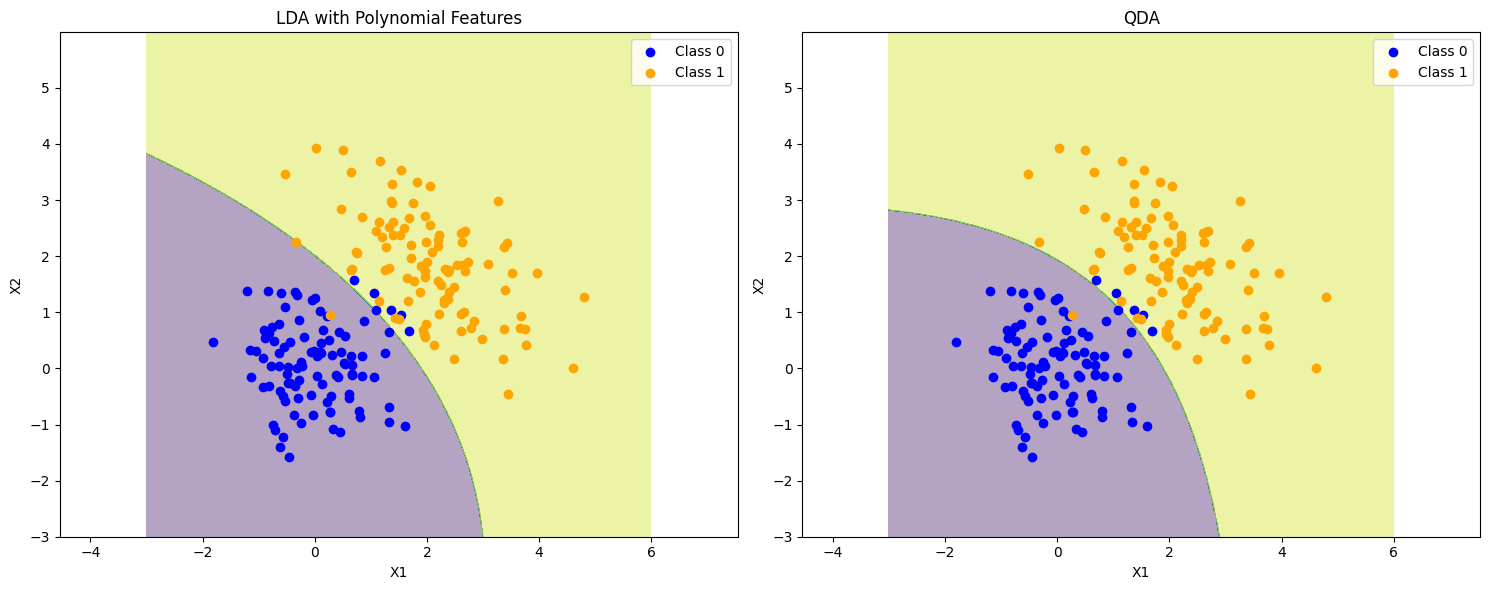

In [41]:
# Perform QDA on the original data (not the polynomially transformed data)
qda_original = QuadraticDiscriminantAnalysis()
qda_original.fit(X, labels)

# Predict classes using the QDA model on the original data
Z_qda_original = qda_original.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
Z_qda_original = Z_qda_original.reshape(x_grid.shape)

# Plotting both LDA with Polynomial Features and QDA for comparison
plt.figure(figsize=(15, 6))

# LDA with Polynomial Features subplot
plt.subplot(1, 2, 1)
plt.contourf(x_grid, y_grid, Z_lda_poly, alpha=0.4)
plt.scatter(class0[:, 0], class0[:, 1], color='blue', label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], color='orange', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('LDA with Polynomial Features')
plt.legend()
plt.axis('equal')

# QDA subplot
plt.subplot(1, 2, 2)
plt.contourf(x_grid, y_grid, Z_qda_original, alpha=0.4)
plt.scatter(class0[:, 0], class0[:, 1], color='blue', label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], color='orange', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('QDA')
plt.legend()
plt.axis('equal')

plt.tight_layout()
plt.show()



# Naive Bayes

In [1]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Sample Data: Features and Labels
# Feature 1: [Feature 2: [Class:
#  1.0,       2.0,       0
#  2.0,       3.0,       0
#  3.0,       2.0,       1
#  4.0,       3.0,       1
#  5.0,       5.0,       1]]

X = np.array([[1, 2], [2, 3], [3, 2], [4, 3], [5, 5]])
y = np.array([0, 0, 1, 1, 1])

# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Train the model using the training sets
model.fit(X, y)

# Sample new data point for which we want to predict the class
new_data = np.array([[3, 3]])

# Predict the probabilities for the new data point
predicted_probabilities = model.predict_proba(new_data)
predicted_probabilities



array([[0.03859502, 0.96140498]])

In [2]:
# Sample Data
X = np.array([[1, 2], [2, 3], [3, 2], [4, 3], [5, 5]])
y = np.array([0, 0, 1, 1, 1])
new_data = np.array([3, 3])

# Calculate prior probabilities π_g for each class
unique_classes, counts = np.unique(y, return_counts=True)
prior_probabilities = counts / len(y)

# Calculate mean and variance for each feature in each class
means = {}
variances = {}

for cls in unique_classes:
    features = X[y == cls]
    means[cls] = np.mean(features, axis=0)
    variances[cls] = np.var(features, axis=0)

# Gaussian Naive Bayes likelihood function
def gaussian_likelihood(x, mean, var):
    return (np.exp(-0.5 * ((x - mean) ** 2) / var) / np.sqrt(2 * np.pi * var))

# Calculate the likelihoods and posterior probabilities
posterior_probabilities = []

for cls in unique_classes:
    likelihood = 1
    for j in range(len(new_data)):
        likelihood *= gaussian_likelihood(new_data[j], means[cls][j], variances[cls][j])

    posterior_prob = prior_probabilities[cls] * likelihood
    posterior_probabilities.append(posterior_prob)

# Normalize the posterior probabilities
posterior_probabilities = np.array(posterior_probabilities)
posterior_probabilities /= np.sum(posterior_probabilities)
posterior_probabilities

array([0.03859501, 0.96140499])

# GAM

In [10]:
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 83.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.2 which is incompatible.


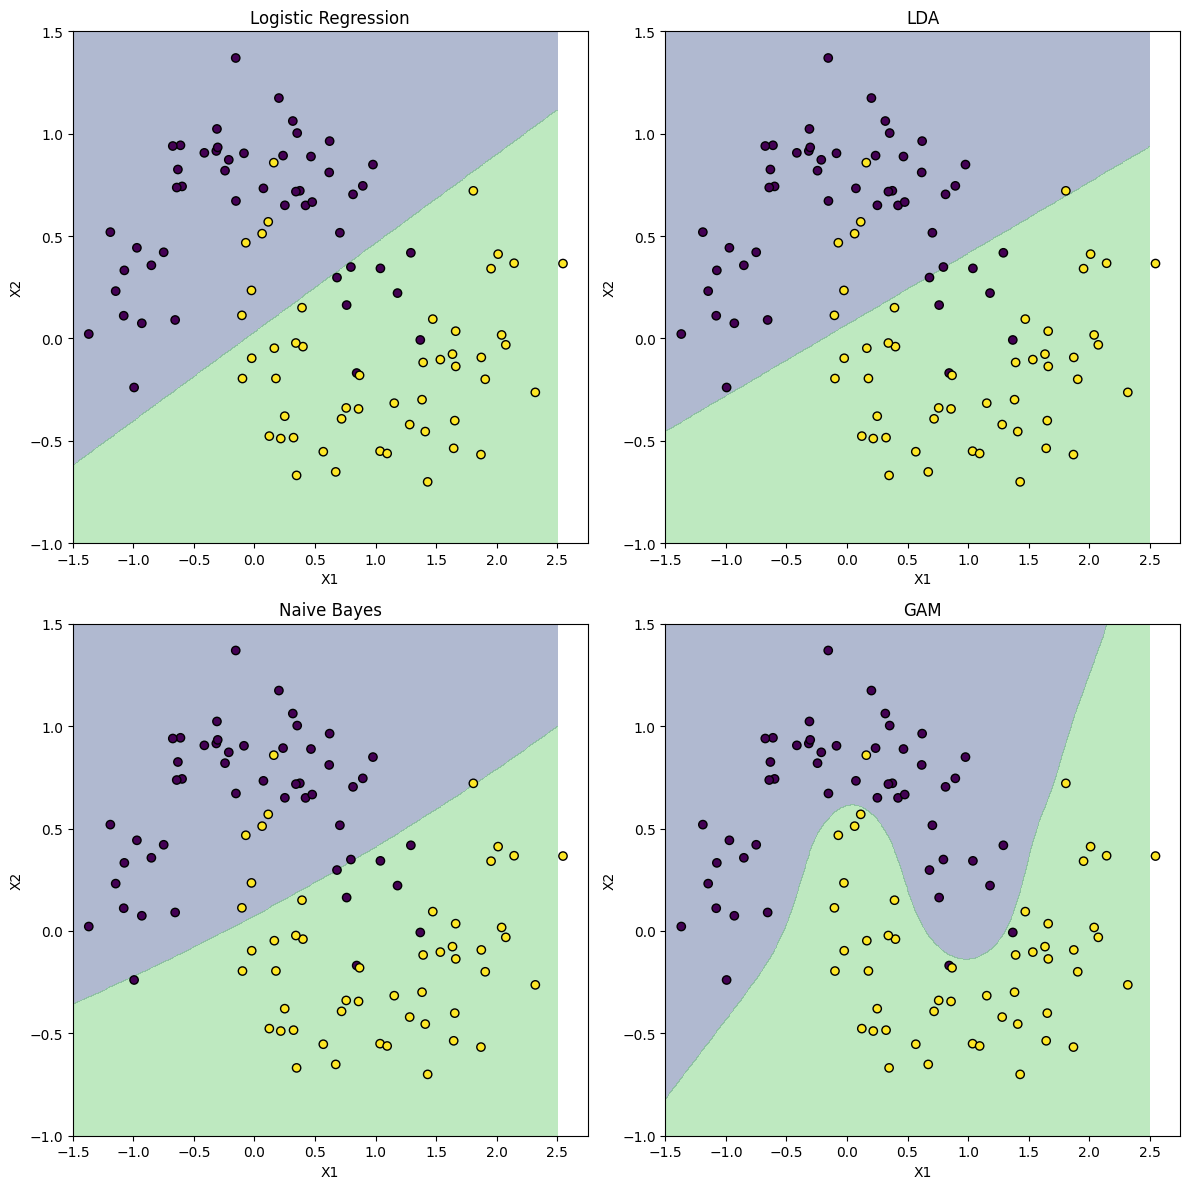

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from pygam import LogisticGAM, s
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

# Generate a synthetic dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Fit models
log_reg = LogisticRegression().fit(X, y)
lda = LinearDiscriminantAnalysis().fit(X, y)
naive_bayes = GaussianNB().fit(X, y)
gam = LogisticGAM(s(0) + s(1)).fit(X, y)

# Create a grid for visualization
x_grid, y_grid = np.meshgrid(np.linspace(-1.5, 2.5, 500), np.linspace(-1, 1.5, 500))
X_grid = np.column_stack([x_grid.ravel(), y_grid.ravel()])

# Predict class labels using each model
Z_log_reg = log_reg.predict(X_grid).reshape(x_grid.shape)
Z_lda = lda.predict(X_grid).reshape(x_grid.shape)
Z_naive_bayes = naive_bayes.predict(X_grid).reshape(x_grid.shape)
Z_gam = (gam.predict_proba(X_grid) > 0.5).astype(int).reshape(x_grid.shape)

# Plotting decision boundaries
plt.figure(figsize=(12, 12))

# Logistic Regression subplot
plt.subplot(2, 2, 1)
plt.contourf(x_grid, y_grid, Z_log_reg, alpha=0.4, levels=[-1, 0, 1])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression')

# LDA subplot
plt.subplot(2, 2, 2)
plt.contourf(x_grid, y_grid, Z_lda, alpha=0.4, levels=[-1, 0, 1])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('LDA')

# Naive Bayes subplot
plt.subplot(2, 2, 3)
plt.contourf(x_grid, y_grid, Z_naive_bayes, alpha=0.4, levels=[-1, 0, 1])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Naive Bayes')

# GAM subplot
plt.subplot(2, 2, 4)
plt.contourf(x_grid, y_grid, Z_gam, alpha=0.4, levels=[-1, 0, 1])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('GAM')

plt.tight_layout()
plt.show()
